# TDE-HMM for wide-range burst detection

In this example, we show how our scikit-learn-like TDE_HMM Estimator can be used for wide-range burst detection in real EEG data.
- First we will load the EEG data and visualize it,
- Then we will use the TDE_HMM Class to infer the parameters of our time-delay embedded hidden Markov model (TDE-HMM),
- Finally we will use the TDE_HMM Class to predict the probability of presence of each state considering our EEG data.

In [1]:
# Storage management
import xarray as xr   # Manages .nc (netCDF) files in Python.
                      # The states' informations are stored in a .nc file for each subject.
    
# Scientific computing
import numpy as np
import scipy.signal as signal

# Visualization
import matplotlib.pyplot as plt

## 1. Loading EEG data

In [2]:
# Get our data
import os
import sys
sys.path.append(r"D:\centrale\3A\info\HMM\myHmmPackage")

subj=2
IC=1

dirname = "../"
filename = dirname + f"data/su{subj}IC{IC}_rawdata.nc"
filename2 = dirname + f"data/su{subj}IC{IC + 2}_rawdata.nc"
ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
ds

<xarray.Dataset>
Dimensions:     (time: 1793, trials: 675, info: 1)
Coordinates:
  * time        (time) float64 -4.0 -3.996 -3.992 -3.988 ... 2.992 2.996 3.0
Dimensions without coordinates: trials, info
Data variables:
    timecourse  (trials, time) float64 ...
    trialinfo   (trials, info) float64 ...

In [3]:
# X is the signal timecourse
X1 = ds['timecourse'].values[:, :, np.newaxis]
X2 = ds2['timecourse'].values[:, :, np.newaxis]
X = np.concatenate((X1, X2), axis=2)

# time is the time axis
time = ds['time'].values

In [4]:
print(X.shape, time.shape)

(675, 1793, 2) (1793,)


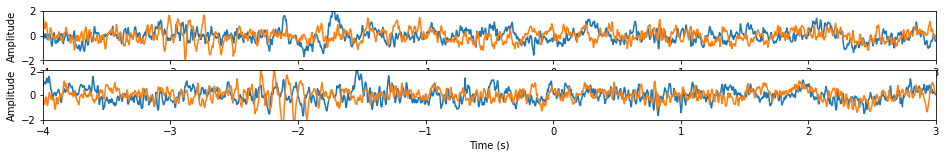

In [5]:
n = 2

plt.figure(figsize=(16, n))
for i in range(n):
    plt.subplot(n, 1, i+1)
    plt.plot(time, X[i])
    plt.xlim([-4, 3])
    plt.xlabel('Time (s)')
    plt.ylim([-2, 2])
    plt.ylabel('Amplitude')

In [6]:
from myHmmPackage.tde_hmm import TDE_HMM

n_states = 3

hmm = TDE_HMM(n_components=n_states)
hmm.fit(X)

TDE_HMM()

Starting probability of the HMM states: 

 [1.00000000e+00 7.64920307e-16 3.42928429e-16] 


Transition matrix of the HMM states: 

 [[9.19389757e-01 4.10661085e-02 3.95441346e-02]
 [4.88116905e-02 9.51188264e-01 4.56849476e-08]
 [4.94738473e-02 1.72991423e-08 9.50526135e-01]] 




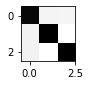

Mean-array for each state:


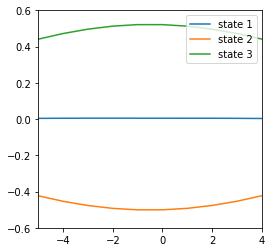

Covariance matrix for each state:


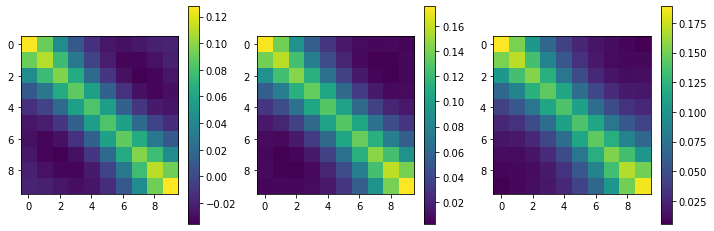

In [13]:
print("Starting probability of the HMM states: \n\n", hmm.startprob_, "\n\n")

n_states = 3

print("Transition matrix of the HMM states: \n\n", hmm.transmat_, "\n\n")
plt.figure(figsize=(1,1))
plt.imshow(hmm.transmat_, cmap='gray_r')
plt.show()

print("Mean-array for each state:")
plt.figure(figsize=(4, 4))
for state in range(n_states):
    plt.plot(np.arange(-5, 5), hmm.means_[state])
    plt.xlim([-5,4])
    plt.ylim([-0.6,0.6])
plt.legend([f'state {i+1}' for i in range(n_states)], loc='upper right')
plt.show()

print("Covariance matrix for each state:")
plt.figure(figsize=(4*n_states, 4))
for state in range(n_states):
    plt.subplot(1, n_states, state+1)
    plt.imshow(hmm.covars_[state])
    plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(16, 2))
plt.xlim([-4, 3])
plt.xlabel('Time (s)')
plt.ylim([0, 1.1])
plt.ylabel('Probability of Presence')

In [7]:
Gamma = hmm.predict_proba(X)
print(Gamma.shape, time.shape)

Text(0, 0.5, 'Presence')

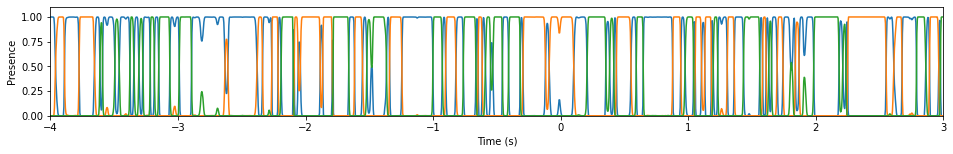

In [11]:
plt.figure(figsize=(16, 2))
plt.plot(time, Gamma[0])
plt.xlim([-4, 3])
plt.xlabel('Time (s)')
plt.ylim([0, 1.1])
plt.ylabel('Probability of Presence')